# Exploring the Data
This notebook generates some statistics within the dataset (at least the labelled one). Some of the code was adapted from original paper's [repository](https://github.com/jonxuxu/harvest-piles).

In [6]:
# import necessary packages
from osgeo import gdal
import pandas as pd
import os
import matplotlib.pyplot as plt
import numpy as np

In [7]:
FOLDER_PATH = "../Dataset"
df = pd.read_csv(os.path.join(FOLDER_PATH, "labels_all.csv"))
df = df.iloc[:, 1:]

random_seed = 42
df.head(10)

filename      lat_1      lon_1      lat_2      lon_2  activity  altitude  \
0    0.tif  13.906780  36.865419  13.904441  36.867757       0.0       834   
1    1.tif  13.904441  36.865419  13.902102  36.867757       0.0       834   
2    2.tif  13.902102  36.865419  13.899764  36.867757       0.0       832   
3   20.tif  13.890409  36.867757  13.888071  36.870096       0.0       850   
4   26.tif  13.906780  36.870096  13.904441  36.872434       0.0       839   
5   32.tif  13.892748  36.870096  13.890409  36.872434       0.0       852   
6   55.tif  13.899764  36.874773  13.897425  36.877112       0.0       852   
7   96.tif  13.895086  36.881789  13.892748  36.884128       0.0       880   
8  104.tif  13.906780  36.884128  13.904441  36.886466       0.0       885   
9  184.tif  13.868805  36.870401  13.866466  36.872739       1.0       801   

    lat_mean   lon_mean    year  month  day  group  
0  13.905610  36.866588  2020.0   11.0  1.0     -1  
1  13.903272  36.866588  2020.0   11.0  1.0     -1  
2  13.900933  36.866588  2020.0   11.0  1.0      0  
3  13.889240  36.868926  2020.0   11.0  1.0      1  
4  13.905610  36.871265  2020.0   11.0  1.0     -1  
5  13.891578  36.871265  2020.0   11.0  1.0      1  
6  13.898594  36.875942  2020.0   11.0  1.0      2  
7  13.893917  36.882958  2020.0   11.0  1.0      3  
8  13.905610  36.885297  2020.0   11.0  1.0     -1  
9  13.867635  36.871570  2020.0   11.0  1.0      4

In [25]:
positives = df[df["activity"] == 1]
negatives  = df[df["activity"] == 0]

print(f"Number of positives: {len(positives)}")
print(f"Number of negatives: {len(negatives)}")

Number of positives: 3149
Number of negatives: 3766


As seen above, there is a slight imbalance between positives and the negatives on the dataset.

Now, we want to see what the general appearance of a satellite image if it was labelled positive and negative, i.e., presence and absence of harvest piles.

In [6]:
def load_geotiff(file):
    ds = gdal.Open(file)
    band1 = ds.GetRasterBand(1).ReadAsArray() # Red channel
    band2 = ds.GetRasterBand(2).ReadAsArray() # Green channel
    band3 = ds.GetRasterBand(3).ReadAsArray() # Blue channel
    img = np.dstack((band1, band2, band3))
    return img

In [72]:
IMAGE_PATH = "../Dataset/skysat_images/"
images = []
coords = []
for _, row in positives.sample(n=20, random_state=42).iterrows():
    path = os.path.join(IMAGE_PATH, row["filename"])
    image = load_geotiff(path)
    images.append(image)
    coords.append((round(row['lat_mean'], 2), round(row['lon_mean'], 2)))

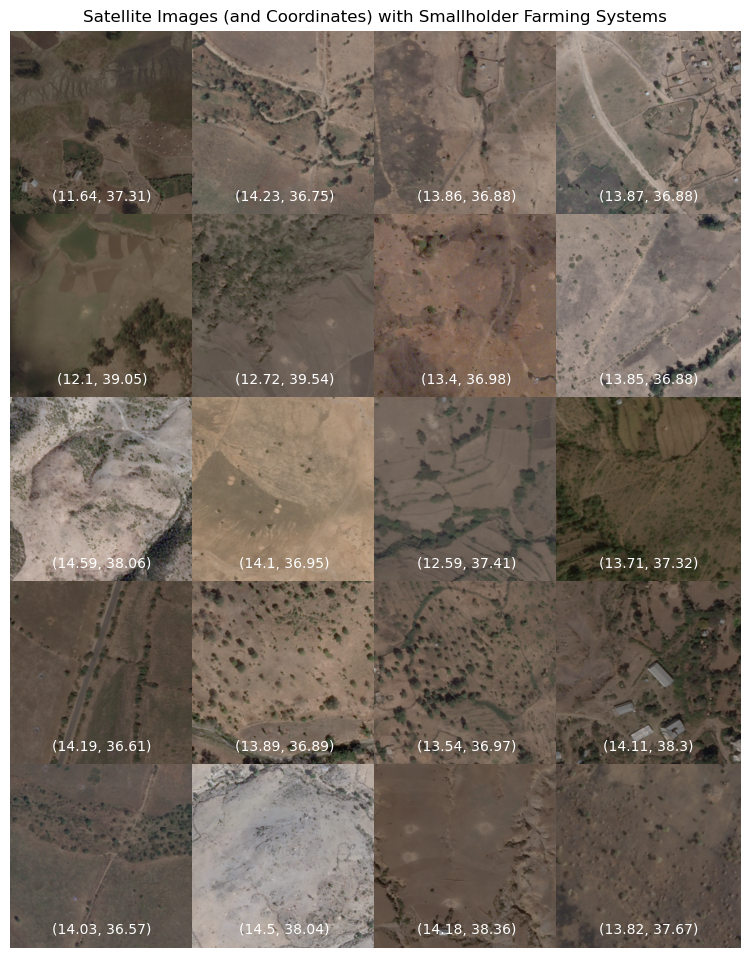

In [73]:
# Create a 4x4 subplot layout
fig, axes = plt.subplots(nrows=5, ncols=4, figsize=(8, 10))

# Loop through the images and plot them in the subplot layout
for i, ax in enumerate(axes.flat):
    ax.imshow(images[i], cmap='gray')  # Change cmap and other options as needed
    ax.axis('off')  # Turn off axes labels and ticks
    ax.annotate(f"{coords[i]}", xy=(0.5, 0.5), xytext=(0.5, 0.1),
                xycoords='axes fraction', textcoords='axes fraction',
                fontsize=10, color='white', ha='center', va='center')

# Adjust spacing and layout
plt.tight_layout(pad=2.5, h_pad=-1, w_pad=0)

# Add title
plt.suptitle("Satellite Images (and Coordinates) with Smallholder Farming Systems")

# Download the figure
plt.savefig("../figures/positive-grid.png", bbox_inches='tight')  # bbox_inches='tight' removes extra whitespace

# Show the plot
plt.show()

In [74]:
images = []
for _, row in negatives.sample(n=20, random_state=42).iterrows():
    path = os.path.join(IMAGE_PATH, row["filename"])
    image = load_geotiff(path)
    images.append(image)
    coords.append((round(row['lat_mean'], 2), round(row['lon_mean'], 2)))

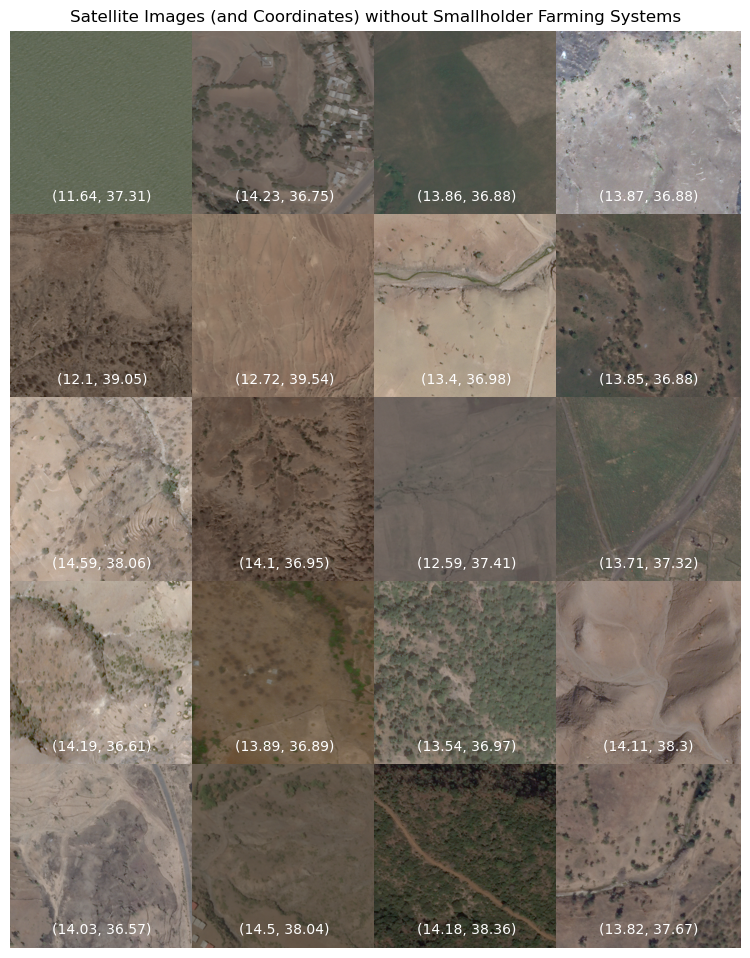

In [75]:
# Create a 4x4 subplot layout
fig, axes = plt.subplots(nrows=5, ncols=4, figsize=(8, 10))

# Loop through the images and plot them in the subplot layout
for i, ax in enumerate(axes.flat):
    ax.imshow(images[i], cmap='gray')  # Change cmap and other options as needed
    ax.axis('off')  # Turn off axes labels and ticks
    ax.annotate(f"{coords[i]}", xy=(0.5, 0.5), xytext=(0.5, 0.1),
                xycoords='axes fraction', textcoords='axes fraction',
                fontsize=10, color='white', ha='center', va='center')

# Adjust spacing and layout
plt.tight_layout(pad=2.5, h_pad=-1, w_pad=0)

# Add title
plt.suptitle("Satellite Images (and Coordinates) without Smallholder Farming Systems")

# Download the figure
plt.savefig("../figures/negative-grid.png", bbox_inches='tight')  # bbox_inches='tight' removes extra whitespace

# Show the plot
plt.show()

Let's further explore the split between the training and test set from the paper.

In [78]:
train_df = pd.read_csv(os.path.join(FOLDER_PATH, "train.csv"))
train_df = train_df.iloc[:, 1:]
test_df = pd.read_csv(os.path.join(FOLDER_PATH, "test.csv"))
test_df = test_df.iloc[:, 1:]
labelled = pd.read_csv(os.path.join(FOLDER_PATH, "labels_all.csv"))
labelled = labelled.iloc[:, 1:]

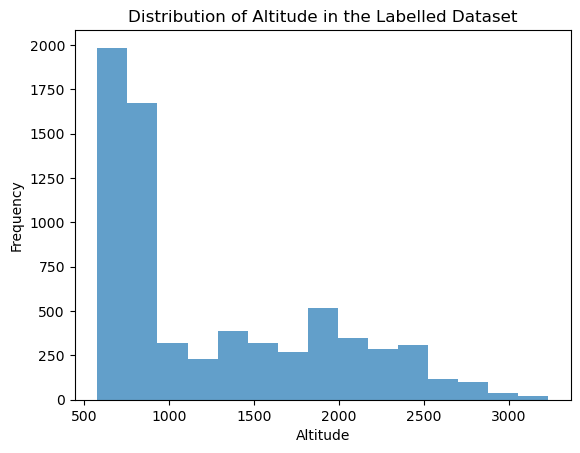

In [82]:
# Create a histogram for the train and test data
plt.hist([labelled['altitude']], bins=15, alpha=0.7, stacked=False)

# Add labels and title
plt.xlabel('Altitude')
plt.ylabel('Frequency')
plt.title('Distribution of Altitude in the Labelled Dataset')

# Show the plot
plt.savefig("../figures/alt-dist", bbox_inches='tight')  # bbox_inches='tight' removes extra whitespace
plt.show()


In [83]:
pos_train = train_df[train_df["activity"] == 1]
neg_train = train_df[train_df["activity"] == 0]
pos_test = test_df[test_df["activity"] == 1]
neg_test = test_df[test_df["activity"] == 0]

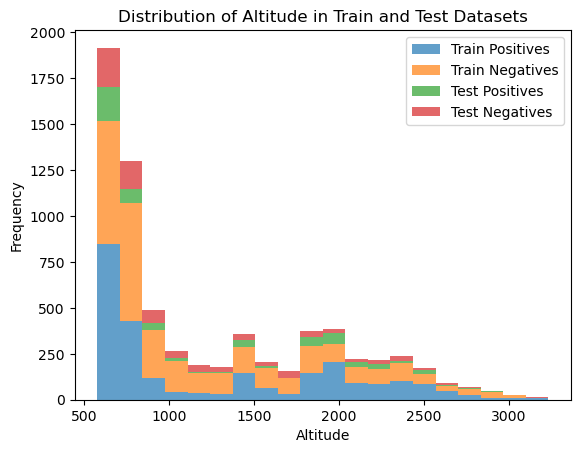

In [84]:
# Create a histogram for the train and test data
field = "altitude"
plt.hist([pos_train[field], neg_train[field],pos_test[field], neg_test[field]], bins=20, label=['Train Positives', 'Train Negatives','Test Positives', 'Test Negatives'], alpha=0.7, stacked=True)

# Add labels and title
plt.xlabel('Altitude')
plt.ylabel('Frequency')
plt.title('Distribution of Altitude in Train and Test Datasets')
plt.legend()

# Show the plot
plt.savefig("../figures/alt-dist-pos-neg", bbox_inches='tight')  # bbox_inches='tight' removes extra whitespace
plt.show()


We want to see the distribution of the coordinates on an actual map.

In [27]:
# Define the coordinates to display on the map
lat_pos = positives['lat_mean']
lat_neg = negatives['lat_mean']
lon_pos = positives['lon_mean']
lon_neg = negatives['lon_mean']
coords_pos = list(zip(lat_pos, lon_pos))
coords_neg = list(zip(lat_neg, lon_neg))

In [29]:
import folium

# Create a map centered at a specific location
ethiopia_map = folium.Map(location=[9.1450, 40.4897], zoom_start=6)


# Add markers for each positive coordinate to the map
for coord in coords_pos:
    folium.CircleMarker(
        location=coord,
        radius=2,
        color='blue',
        fill=True,
        fill_color='blue'
    ).add_to(ethiopia_map)

# Add markers for each negative coordinate to the map
for coord in coords_neg:
    folium.CircleMarker(
        location=coord,
        radius=2,
        color='red',
        fill=True,
        fill_color='red'
    ).add_to(ethiopia_map)

# ethiopia_map.save('../figures/map-with-coordinates.html')
ethiopia_map

In [31]:
group_vals = np.unique(df['group'])
print(group_vals)

[ -1   0   1   2   3   4   5   6   7   8   9  10  11  12  13  14  15  16
  17  18  19  20  21  22  23  24  25  26  27  28  29  30  31  32  33  34
  35  36  37  38  39  40  41  42  43  44  45  46  47  48  49  50  51  52
  53  54  55  56  57  58  59  60  61  62  63  64  65  66  67  68  69  70
  71  72  73  74  75  76  77  78  79  80  81  82  83  84  85  86  87  88
  89  90  91  92  93  94  95  96  97  98  99 100 101 102 103 104 105 106
 107 108 109 110 111 112 113 114 115 116 117 118 119 120 121 122 123 124
 125 126 127 128 129 130 131 132 133 134 135 136 137 138 139 140 141 142
 143 144 145 146 147 148 149 150 151 152 153 154 155 156 157 158 159 160
 161 162 163 164 165 166 167 168 169 170 171 172 173 174 175 176 177 178
 179 180 181 182 183 184 185 186 187 188 189 190 191 192 193 194 195 196
 197 198 199 200 201 202 203 204 205 206 207 208 209 210 211 212 213]
